# Bharat Intern 

# Name : Nidhi Pratap Surti

# Data Science Internship

Stock Prediction Project

Take stock price of any company you
want and predicts its price by using LSTM.
Use only Jupyter notebook code.

Import the neccessary Librariers

In [2]:
pip install tensorflow


  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)


In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,SimpleRNN,LSTM

from warnings import filterwarnings

Load the Dataset

In [4]:
df = pd.read_csv('C:/Users/Dell/Downloads/archive (18)/Google_Stock_Price_Train.csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
data = df.loc[:,["Open"]].values


train = data[:len(data)-50] 
test = data[len(train):] # last 50 data will be our test data

# reshape
train=train.reshape(train.shape[0],1)

In [7]:
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [779.8 ],
       [787.85],
       [798.24]])

Data Preprocessing

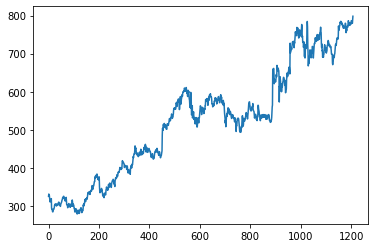

In [8]:
plt.plot(train);

In [9]:
sc=MinMaxScaler()
sc_train=sc.fit_transform(train)

In [10]:
sc_train

array([[0.08886192],
       [0.10045847],
       [0.09768454],
       ...,
       [0.96447835],
       [0.97998536],
       [1.        ]])

In [11]:
len(sc_train)

1208

In [12]:
X_train = []
y_train = []
for i in range(60, 1208):
    X_train.append(sc_train[i-60:i, 0])
    y_train.append(sc_train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
# reshape

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [14]:
regressor = Sequential()

regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) 

regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))


regressor.add(Dense(units = 1))


In [15]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [17]:
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
36/36 [==============================] - 10s 55ms/step - loss: 0.0050
Epoch 2/50
36/36 [==============================] - 2s 57ms/step - loss: 0.0048
Epoch 3/50
36/36 [==============================] - 2s 54ms/step - loss: 0.0043
Epoch 4/50
36/36 [==============================] - 2s 57ms/step - loss: 0.0040
Epoch 5/50
36/36 [==============================] - 2s 58ms/step - loss: 0.0037
Epoch 6/50
36/36 [==============================] - 2s 58ms/step - loss: 0.0043
Epoch 7/50
36/36 [==============================] - 2s 56ms/step - loss: 0.0038
Epoch 8/50
36/36 [==============================] - 2s 62ms/step - loss: 0.0042
Epoch 9/50
36/36 [==============================] - 2s 61ms/step - loss: 0.0038
Epoch 10/50
36/36 [==============================] - 2s 66ms/step - loss: 0.0037
Epoch 11/50
36/36 [==============================] - 2s 60ms/step - loss: 0.0033
Epoch 12/50
36/36 [==============================] - 2s 55ms/step - loss: 0.0037
Epoch 13/50
36/36 [=================

In [18]:
len(train) - len(test) - 60

1098

In [19]:
inputs = data[len(train) - len(test) - 60:]
inputs = sc.transform(inputs) 

In [20]:
X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0]) # 0 dan 60 a, 1 den 61 e gibi kaydirarark 60 eleman aliyoruz 
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [21]:
predicted_data = regressor.predict(X_test)
predicted_data = sc.inverse_transform(predicted_data) 

4/4 [==============================] - 30s 16ms/step


In [22]:
predicted_data

array([[779.4212 ],
       [780.2267 ],
       [780.6874 ],
       [780.8718 ],
       [780.6588 ],
       [780.5232 ],
       [780.23975],
       [779.96265],
       [778.6326 ],
       [778.17444],
       [777.71045],
       [778.1548 ],
       [777.54926],
       [776.5108 ],
       [775.9982 ],
       [775.9363 ],
       [775.89575],
       [776.31714],
       [776.95465],
       [777.5579 ],
       [778.64954],
       [779.49713],
       [778.7232 ],
       [775.81274],
       [773.6595 ],
       [772.55817],
       [772.8483 ],
       [773.92163],
       [775.8879 ],
       [776.9922 ],
       [777.28284],
       [778.51855],
       [780.14307],
       [781.30005],
       [781.31714],
       [780.34204],
       [780.3477 ],
       [780.209  ],
       [779.77124],
       [778.8182 ],
       [779.066  ],
       [779.7254 ],
       [780.2913 ],
       [780.43036],
       [781.05035],
       [781.8465 ],
       [782.1723 ],
       [781.5833 ],
       [780.927  ],
       [781.2904 ],


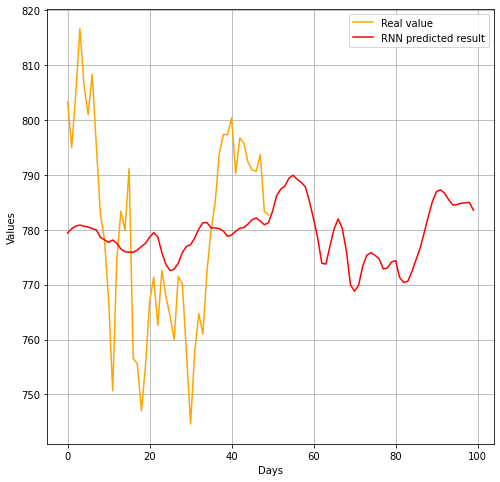

In [23]:
plt.figure(figsize=(8,8))
plt.plot(test,color="orange",label="Real value")
plt.plot(predicted_data,color="red",label="RNN predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

LSTM 

In [24]:
X_train.shape

(1148, 60, 1)

In [25]:
model1 = Sequential()
model1.add(LSTM(10, input_shape=(None,1)))
model1.add(Dense(1))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491 (1.92 KB)
Trainable params: 491 (1.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model1.compile(loss='mean_squared_error', optimizer='adam')

In [27]:
model1.fit(X_train, y_train, epochs=50)

Epoch 1/50
36/36 [==============================] - 17s 29ms/step - loss: 0.4039
Epoch 2/50
36/36 [==============================] - 1s 21ms/step - loss: 0.0565
Epoch 3/50
36/36 [==============================] - 1s 22ms/step - loss: 0.0142
Epoch 4/50
36/36 [==============================] - 1s 20ms/step - loss: 0.0082
Epoch 5/50
36/36 [==============================] - 1s 23ms/step - loss: 0.0050
Epoch 6/50
36/36 [==============================] - 1s 21ms/step - loss: 0.0035
Epoch 7/50
36/36 [==============================] - 1s 21ms/step - loss: 0.0031
Epoch 8/50
36/36 [==============================] - 1s 23ms/step - loss: 0.0029
Epoch 9/50
36/36 [==============================] - 1s 25ms/step - loss: 0.0027
Epoch 10/50
36/36 [==============================] - 1s 23ms/step - loss: 0.0026
Epoch 11/50
36/36 [==============================] - 1s 23ms/step - loss: 0.0025
Epoch 12/50
36/36 [==============================] - 1s 26ms/step - loss: 0.0024
Epoch 13/50
36/36 [=================

In [28]:
predicted_model1=model1.predict(X_test)
predicted_model1=sc.inverse_transform(predicted_model1)
predicted_model1

4/4 [==============================] - 10s 7ms/step


array([[767.5576 ],
       [770.49396],
       [773.1743 ],
       [775.2323 ],
       [777.2762 ],
       [778.5725 ],
       [779.3928 ],
       [780.16864],
       [780.0909 ],
       [779.78564],
       [779.4589 ],
       [778.45575],
       [777.2056 ],
       [776.1043 ],
       [774.82983],
       [773.644  ],
       [772.329  ],
       [771.38745],
       [770.8081 ],
       [770.34344],
       [770.65625],
       [770.8869 ],
       [770.701  ],
       [769.58673],
       [769.5233 ],
       [768.4361 ],
       [767.7009 ],
       [767.3867 ],
       [767.20013],
       [766.8914 ],
       [767.20483],
       [768.1429 ],
       [769.5951 ],
       [770.778  ],
       [771.6707 ],
       [772.9489 ],
       [774.2487 ],
       [774.8568 ],
       [775.33167],
       [775.80194],
       [776.2885 ],
       [776.538  ],
       [776.822  ],
       [776.88525],
       [777.73724],
       [778.04706],
       [778.33936],
       [778.7385 ],
       [778.89246],
       [779.71954],


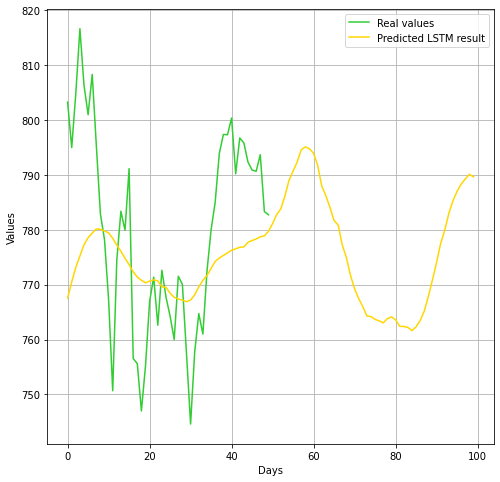

In [29]:
plt.figure(figsize=(8,8))
plt.plot(test,color="LimeGreen",label="Real values")
plt.plot(predicted_model1,color="Gold",label="Predicted LSTM result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [30]:
model2 = Sequential()
model2.add(LSTM(50, input_shape=(None,1)))
model2.add(Dense(1))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model2.compile(loss='mean_squared_error', optimizer='adam')

In [32]:
model2.fit(X_train, y_train, epochs=50)

Epoch 1/50
36/36 [==============================] - 31s 26ms/step - loss: 0.0513
Epoch 2/50
36/36 [==============================] - 1s 25ms/step - loss: 0.0026
Epoch 3/50
36/36 [==============================] - 1s 27ms/step - loss: 0.0013
Epoch 4/50
36/36 [==============================] - 1s 25ms/step - loss: 0.0011
Epoch 5/50
36/36 [==============================] - 1s 25ms/step - loss: 0.0011
Epoch 6/50
36/36 [==============================] - 1s 25ms/step - loss: 0.0011
Epoch 7/50
36/36 [==============================] - 1s 25ms/step - loss: 0.0011
Epoch 8/50
36/36 [==============================] - 1s 25ms/step - loss: 0.0010
Epoch 9/50
36/36 [==============================] - 1s 25ms/step - loss: 0.0011
Epoch 10/50
36/36 [==============================] - 1s 26ms/step - loss: 0.0010
Epoch 11/50
36/36 [==============================] - 1s 26ms/step - loss: 9.9107e-04
Epoch 12/50
36/36 [==============================] - 1s 25ms/step - loss: 9.7840e-04
Epoch 13/50
36/36 [=========

In [33]:
predicted_model2=model2.predict(X_test)
predicted_model2=sc.inverse_transform(predicted_model2)
predicted_model2

4/4 [==============================] - 10s 12ms/step


array([[778.5105 ],
       [781.3686 ],
       [783.73486],
       [784.5707 ],
       [785.50616],
       [785.1904 ],
       [784.008  ],
       [783.49396],
       [781.7757 ],
       [779.90594],
       [778.8676 ],
       [776.88916],
       [774.4717 ],
       [773.00183],
       [771.82654],
       [771.1499 ],
       [770.1854 ],
       [770.0425 ],
       [770.9283 ],
       [771.8928 ],
       [774.3546 ],
       [776.1209 ],
       [775.5528 ],
       [771.3452 ],
       [769.8279 ],
       [767.2837 ],
       [766.0417 ],
       [766.78284],
       [768.2611 ],
       [768.88495],
       [770.363  ],
       [773.35175],
       [777.44055],
       [779.9293 ],
       [780.1446 ],
       [780.6101 ],
       [781.591  ],
       [781.03754],
       [779.964  ],
       [779.37506],
       [779.62445],
       [779.794  ],
       [780.1465 ],
       [779.9959 ],
       [782.01715],
       [783.0271 ],
       [783.28046],
       [783.5131 ],
       [783.1655 ],
       [784.7354 ],


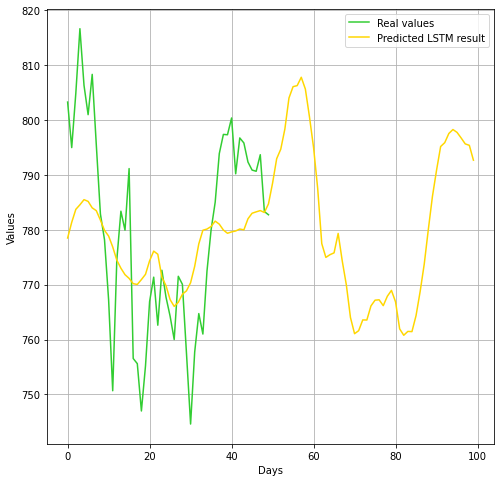

In [34]:
plt.figure(figsize=(8,8))
plt.plot(test,color="LimeGreen",label="Real values")
plt.plot(predicted_model2,color="Gold",label="Predicted LSTM result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()